# Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Config
sns.set_theme(style="darkgrid")
sns.set()

# Read data

In [2]:
df = pd.read_csv("../data/justjoin_offers.csv")

In [3]:
df.head()

,title,street,city,country_code,address_text,marker_icon,workplace_type,company_name,company_url,company_size,...,company_logo_url,skills,remote,contract_type,salary_min,salary_max,currency,num_technology,technology,levels
0,UI/UX Designer,Krucza 50,Warszawa,PL,"Krucza 50, Warszawa",ux,office,ShareSpace,http://www.sharespace.work,20+,...,https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'UX Design', 'level': 4}, {'name': '...",False,b2b,9000.0,12000.0,pln,3,"['UX Design', 'UI Design', 'Figma']","[4, 5, 5]"
1,Test Automation Engineer,ul. Krucza 50,Warszawa,PL,"ul. Krucza 50, Warszawa",testing,office,ShareSpace,http://www.sharespace.work,20+,...,https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'JavaScript', 'level': 2}, {'name': ...",False,b2b,10000.0,12000.0,pln,3,"['JavaScript', 'Postman', 'Cypress']","[2, 3, 3]"
2,IT Support Specialist,Krucza 50,Warszawa,PL,"Krucza 50, Warszawa",support,office,ShareSpace,http://www.sharespace.work,20+,...,https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'REST API', 'level': 2}, {'name': 'G...",False,b2b,6000.0,8000.0,pln,3,"['REST API', 'GSUITE', 'JIRA']","[2, 2, 3]"
3,Programista Wordpress,Centrum,Kraków,PL,"Centrum, Kraków",php,office,L.GRANT,https://www.lgrant.com/,10,...,https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'Responsive Web Design', 'level': 3}...",False,permanent,7000.0,9000.0,pln,3,"['Responsive Web Design', 'WordPress', 'PHP 7']","[3, 3, 3]"
4,Tester / Analyst,Wołoska 5,Warszawa,PL,"Wołoska 5, Warszawa",testing,partly_remote,Turbine Analytics S.A.,http://turbineanalytics.com,33,...,https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'Test Automation', 'level': 3}, {'na...",False,b2b,6000.0,11000.0,pln,3,"['Test Automation', 'Testing Tools', 'Testing']","[3, 3, 3]"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             4930 non-null   object 
 1   street            4923 non-null   object 
 2   city              4930 non-null   object 
 3   country_code      4930 non-null   object 
 4   address_text      4930 non-null   object 
 5   marker_icon       4930 non-null   object 
 6   workplace_type    4930 non-null   object 
 7   company_name      4930 non-null   object 
 8   company_url       4930 non-null   object 
 9   company_size      4930 non-null   object 
 10  experience_level  4930 non-null   object 
 11  latitude          4930 non-null   float64
 12  longitude         4930 non-null   float64
 13  published_at      4930 non-null   object 
 14  remote_interview  4930 non-null   bool   
 15  id                4930 non-null   object 
 16  employment_types  4930 non-null   object 


# Salary Target

In [5]:
# Drop NaN values
print(df['salary_min'].isna().sum())
df = df.dropna()

1233


# City

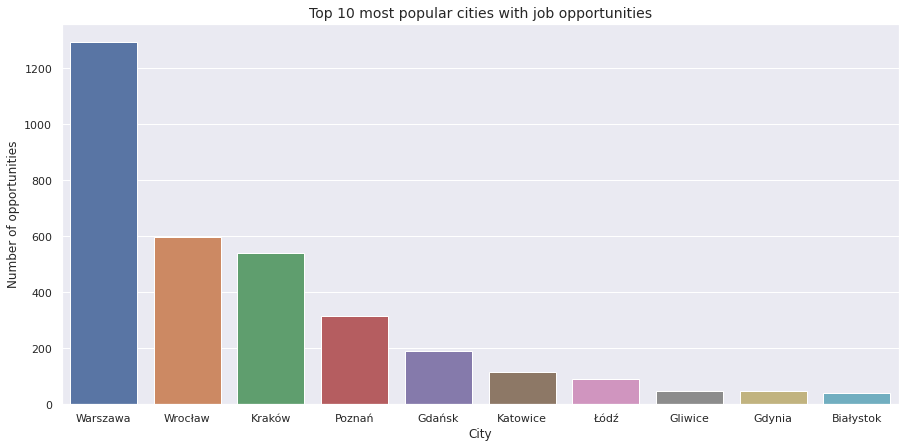

In [6]:
# Get first ten cities from column 'city'
city = df["city"].value_counts()[:10]

# Plotting a bar graph
plt.figure(figsize=(15,7))
sns.barplot(x=city.index, y=city.values)

# Simple config
plt.title("Top 10 most popular cities with job opportunities", fontsize=14)
plt.ylabel("Number of opportunities")
plt.xlabel("City")
plt.show()

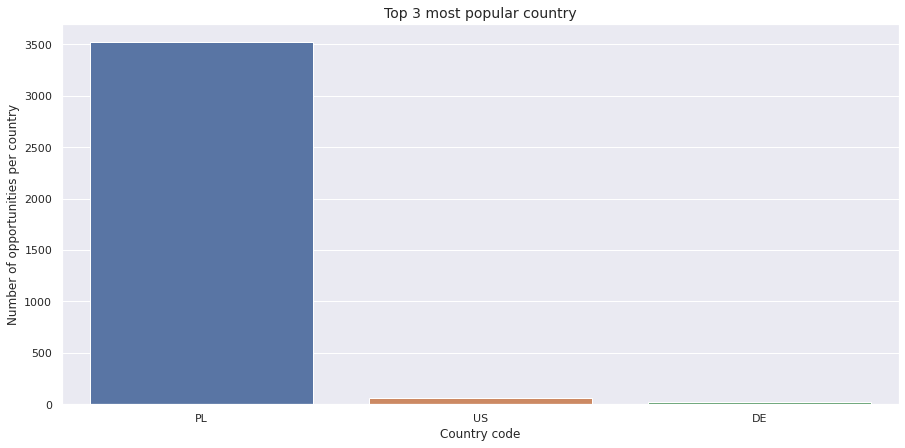

In [7]:
# Top 3 countries
countries = df["country_code"].value_counts()[:3]

# Plotting a bar graph
plt.figure(figsize=(15,7))
sns.barplot(y=countries.values, x=countries.index)

# Simple config
plt.title("Top 3 most popular country", fontsize=14)
plt.ylabel("Number of opportunities per country")
plt.xlabel("Country code")
plt.show()

I will be working only on data from Poland, so let's remove other countries

In [8]:
print("Before:", df.shape)
df = df.loc[df["country_code"] == "PL"]
print("After:", df.shape)

Before: (3691, 27)
After: (3523, 27)


# Technologies

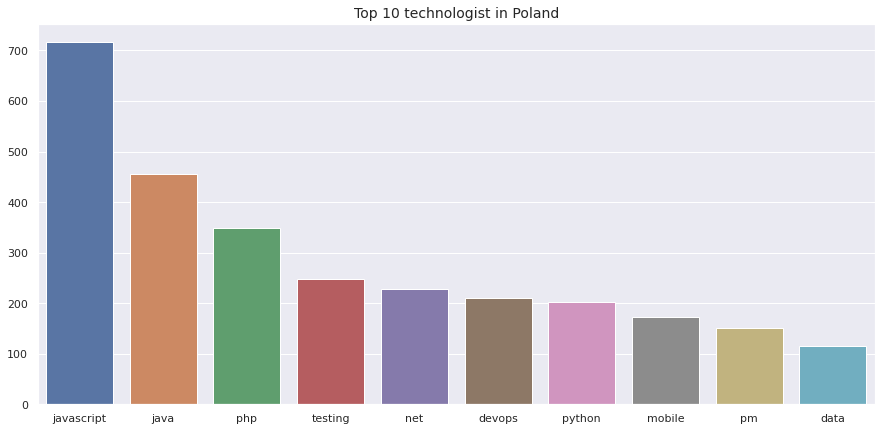

In [9]:
technologies = df["marker_icon"].value_counts()[:10]

plt.figure(figsize=(15,7))
sns.barplot(y=technologies.values, x=technologies.index)

plt.title("Top 10 technologist in Poland", fontsize=14)
plt.show()

# Workplace vs. COVID-19

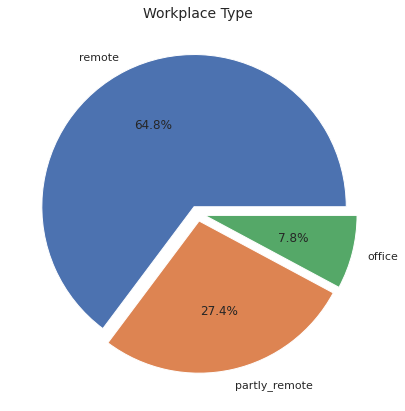

In [10]:
df_workplace = df["workplace_type"].value_counts()

plt.figure(figsize=(15,7))
plt.pie(x=df_workplace.values, labels=df_workplace.index, explode=[0.05]*3, autopct="%.1f%%")
plt.title("Workplace Type", fontsize=14)
plt.show()

# Company size

In [11]:
# Company size view
df["company_size"].sample(5)

4517      100
4132      50+
2472    11-60
1735      40+
2649      157
Name: company_size, dtype: object

In [12]:
df["company_size"] = df["company_size"].str.replace(r'[-+<>,. " "]', "")
df["company_size"] = df["company_size"].apply(int)

In [13]:
df["company_size_bin"] = pd.cut(df["company_size"],
                                bins=[0,30,500,1000,100000],
                                labels=["very_small", "small","medium", "large"])

In [14]:
# Check results
df[["company_size", "company_size_bin"]]

,company_size,company_size_bin
0,20,very_small
1,20,very_small
2,20,very_small
3,10,very_small
4,33,small
...,...,...
4923,20,very_small
4925,1020,large
4926,40,small
4928,1050,large


# Experience Level

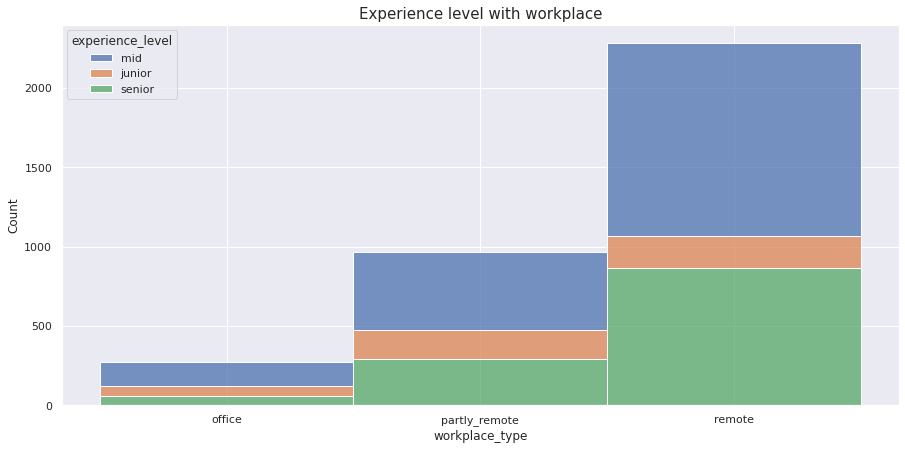

In [15]:
plt.figure(figsize=(15,7))

sns.histplot(
    df,
    x="workplace_type", hue="experience_level",
    multiple="stack",
);

plt.title("Experience level with workplace", fontsize=15.0);

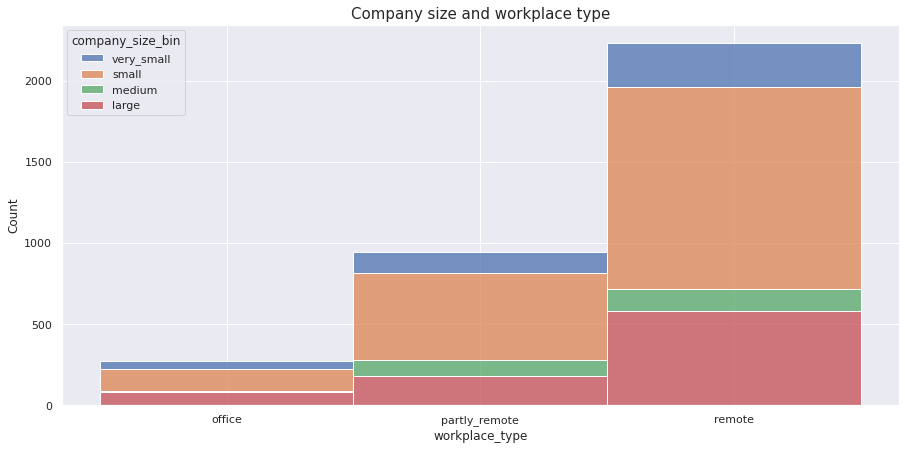

In [16]:
plt.figure(figsize=(15,7))

sns.histplot(
    df,
    x="workplace_type", hue="company_size_bin",
    multiple="stack",
);

plt.title("Company size and workplace type", fontsize=15.0);

# Salary (Target)

In [17]:
df["salary_mean"] = df[["salary_min", "salary_max"]].mean(axis=1)

### Convert to EUR, USD to PLN

In [18]:
df["currency"].value_counts()

pln    3482
usd      28
eur      13
Name: currency, dtype: int64

In [19]:
 currency = {"usd": 3.90,
            "eur": 4.60,
            "gbp": 5.40,
            "chf": 4.20,
            "pln" : 1.0
           }

In [20]:
df = df.replace({"currency": currency})

In [21]:
df["salary_mean"] = df["salary_mean"] * df["currency"]

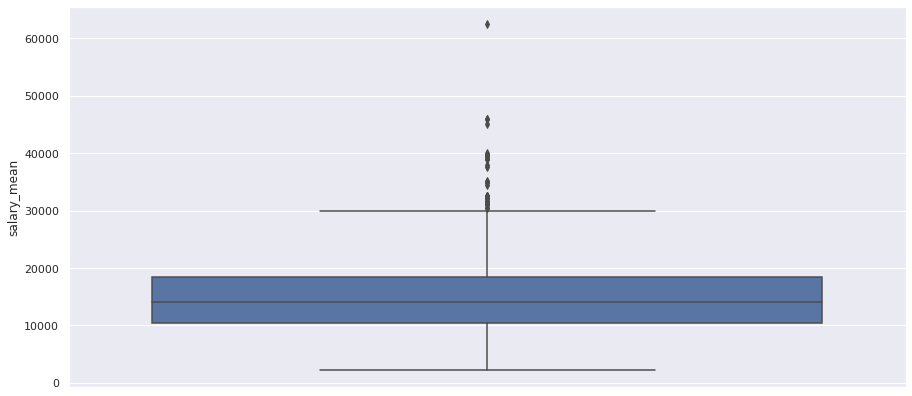

In [22]:
plt.figure(figsize=(15,7))
sns.boxplot(y=df["salary_mean"], hue=['workplace_type']);

In [23]:
df["salary_mean"].describe()

count     3523.000000
mean     14494.880329
std       5829.343077
min       2250.000000
25%      10500.000000
50%      14000.000000
75%      18490.000000
max      62500.000000
Name: salary_mean, dtype: float64

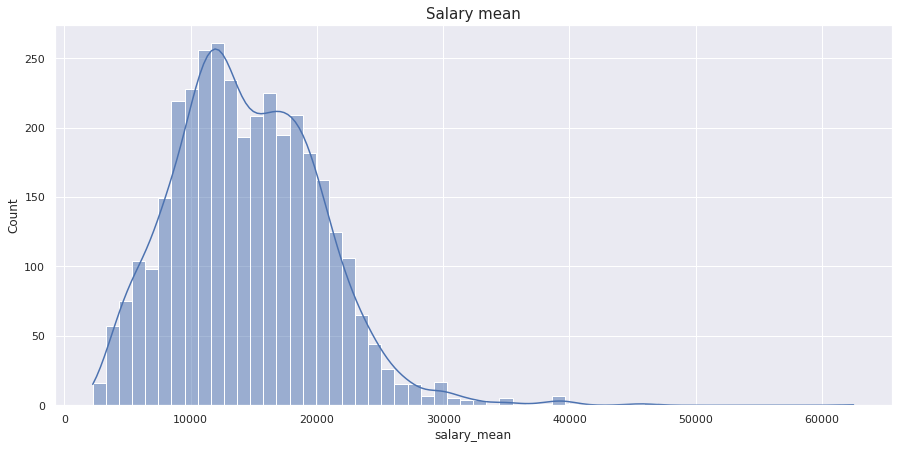

In [24]:
plt.figure(figsize=(15,7))
sns.histplot(data=df, x="salary_mean", kde=True);

plt.title("Salary mean", fontsize=15.0);

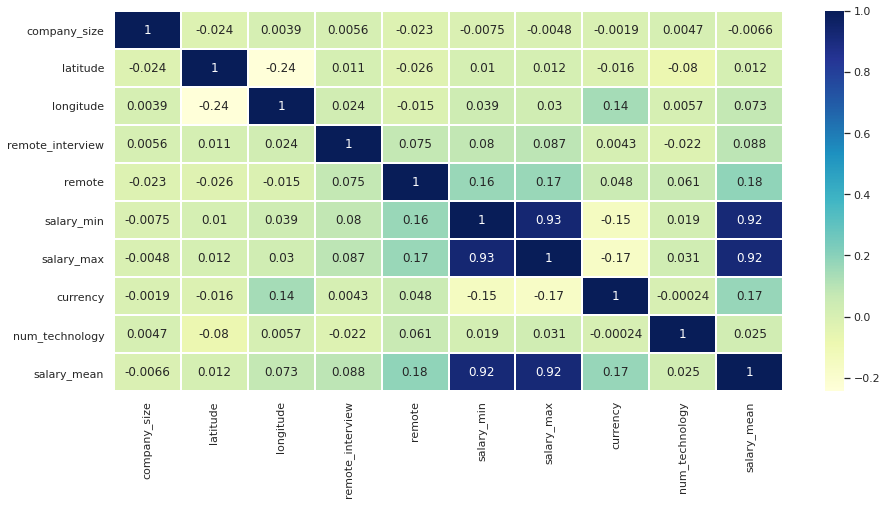

In [25]:
plt.figure(figsize=(15,7))
df_corr = df.corr()

sns.heatmap(data=df_corr,
            annot=True,
            linewidths=2,
            cmap="YlGnBu");

# Create numerical data

In [26]:
df.head()

,title,street,city,country_code,address_text,marker_icon,workplace_type,company_name,company_url,company_size,...,remote,contract_type,salary_min,salary_max,currency,num_technology,technology,levels,company_size_bin,salary_mean
0,UI/UX Designer,Krucza 50,Warszawa,PL,"Krucza 50, Warszawa",ux,office,ShareSpace,http://www.sharespace.work,20,...,False,b2b,9000.0,12000.0,1.0,3,"['UX Design', 'UI Design', 'Figma']","[4, 5, 5]",very_small,10500.0
1,Test Automation Engineer,ul. Krucza 50,Warszawa,PL,"ul. Krucza 50, Warszawa",testing,office,ShareSpace,http://www.sharespace.work,20,...,False,b2b,10000.0,12000.0,1.0,3,"['JavaScript', 'Postman', 'Cypress']","[2, 3, 3]",very_small,11000.0
2,IT Support Specialist,Krucza 50,Warszawa,PL,"Krucza 50, Warszawa",support,office,ShareSpace,http://www.sharespace.work,20,...,False,b2b,6000.0,8000.0,1.0,3,"['REST API', 'GSUITE', 'JIRA']","[2, 2, 3]",very_small,7000.0
3,Programista Wordpress,Centrum,Kraków,PL,"Centrum, Kraków",php,office,L.GRANT,https://www.lgrant.com/,10,...,False,permanent,7000.0,9000.0,1.0,3,"['Responsive Web Design', 'WordPress', 'PHP 7']","[3, 3, 3]",very_small,8000.0
4,Tester / Analyst,Wołoska 5,Warszawa,PL,"Wołoska 5, Warszawa",testing,partly_remote,Turbine Analytics S.A.,http://turbineanalytics.com,33,...,False,b2b,6000.0,11000.0,1.0,3,"['Test Automation', 'Testing Tools', 'Testing']","[3, 3, 3]",small,8500.0


In [27]:
numerical_df = df[["city",
                   "marker_icon",
                   "salary_mean", 
                   "workplace_type",
                   "experience_level",
                   "contract_type",
                   "company_size_bin"
                  ]]

In [28]:
# Export dataframe with 29 columns
df.to_csv("../data/full_df.csv", index=False)

# Export numerical dataframe
numerical_df.to_csv("../data/model_df.csv", index=False)

In [29]:
numerical_df["city"] = numerical_df.loc[:, "city"].astype("category").cat.codes
numerical_df["marker_icon"] = numerical_df.loc[:, "marker_icon"].astype("category").cat.codes

numerical_df = pd.get_dummies(numerical_df, columns=["workplace_type",
                                                     "experience_level",
                                                     "contract_type",
                                                     "company_size_bin"], prefix="feature")

In [30]:
numerical_df.head()

,city,marker_icon,salary_mean,feature_office,feature_partly_remote,feature_remote,feature_junior,feature_mid,feature_senior,feature_b2b,feature_mandate_contract,feature_permanent,feature_very_small,feature_small,feature_medium,feature_large
0,39,23,10500.0,1,0,0,0,1,0,1,0,0,1,0,0,0
1,39,22,11000.0,1,0,0,0,1,0,1,0,0,1,0,0,0
2,39,21,7000.0,1,0,0,1,0,0,1,0,0,1,0,0,0
3,16,15,8000.0,1,0,0,0,1,0,0,0,1,1,0,0,0
4,39,22,8500.0,0,1,0,0,1,0,1,0,0,0,1,0,0


## Correlation

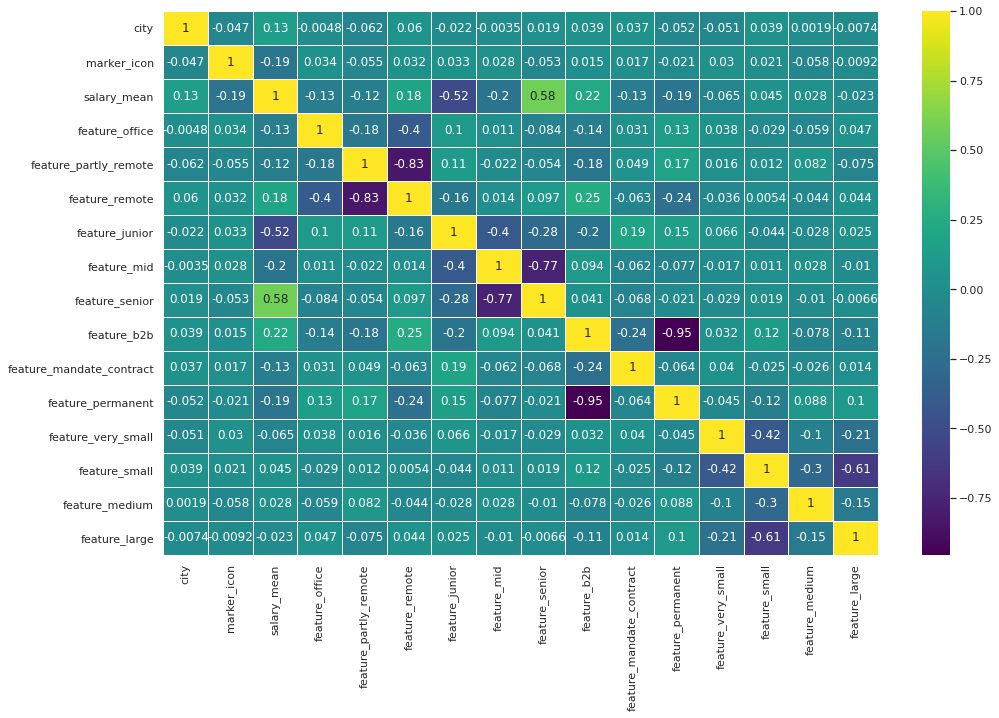

In [31]:
plt.figure(figsize=(16,10))
correlation = numerical_df.corr()
sns.heatmap(correlation, annot=True, linewidths=0.5, cmap="viridis");

In [32]:
numerical_df.to_csv("../data/numerical_df.csv", index=False)